# Traffic Light Classifier
---
In this project, I am going to use computer vision techniques to build a classifier for images of traffic lights! I will read a dataset of traffic light images in which on of three lights is illuminated: red, yellow or green.

The tasks will be broken into a few sections to classify the traffic light images into three classes: red, yellow or green:

**Load and visualize the data** The first step in any classification task is to be familiar with my data; I will need to load in the images of traffic lights and visualize them.

**Pre-processing** The input images and output labels need to be standardized. This way, I can analyze the input images using the same classification pipeline, and know what output to expect when I eventually classify a new image. 

**Feature extraction** Next, I will extract some features from each image that will help distinguish and eventually classify the images. 

**Classification and visualizing error** Finally, I will write one function that uses my features to classify any traffic light image. This function will take in an image and output a label. 

**Evaluate my model** I will determine the accuracy of my classification model. My goal is to classify with >90% accuracy and never classify any red lights as green. 

Here is a some sample images from the dataset (from left to right: red, green, and yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


This traffic light dataset consists of 1484 number of color images in 3 categories - red, yellow and green. As with most human-sourced data, the data is not evenly distributed among the types. These are:
 * 904 red traffic light images
 * 536 green traffic light images 
 * 44 yellow traffic light images 
 

## Import Resources
---

In [1]:
import cv2
import helpers # my helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline 

## Training and Testing Data
---

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images, for you to use as you create a classifier.
* 20% are test images, which will be used to test the accuracy of your classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## Define the image directories

First, I wil set some variables to keep track of the images:

    IMAGE_DIR_TRAINING: the directory where the training image data is stored
    IMAGE_DIR_TEST: the directory where the test image data is stored

In [2]:
# Image directories
IMAGE_DIR_TRAINING = "images/training/"
IMAGE_DIR_TEST = "images/test/"

In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)

## Visualize the Data
---

label: red
shape: (81, 43, 3)


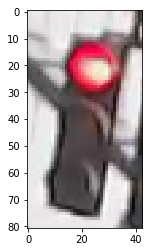

In [6]:
# The first image in IMAGE_LIST is displayed below
test_im = 0
selected_image = IMAGE_LIST[test_im][0]
selected_label = IMAGE_LIST[test_im][1]
print("label:",selected_label)
print("shape:",str(selected_image.shape))
plt.imshow(selected_image)

# Pre-process the Data
---

After loading in each image, I have to standardize the input and output!

### Input

This means that every input image should be in the same format, of the same size, and so on. I'll be creating features by performing the same analysis on every picture, and for a classification task like this, it's important that **similar images create similar features**! 

### Output

**one-hot encoded labels** I will need the output to be a label that is easy to read and easy to compare with other labels.

<img src="images/processing_steps.png" width="80%" height="80%">


### (IMPLEMENTATION): Standardizing the input images

* Resizing each image to the desired input size: 32x32px.

In [7]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image): 
    standard_im = np.copy(image)
    return cv2.resize(standard_im,(32,32))


## Standardize the output

**one-hot encoding** With each loaded image, I will also specify the expected output.

Since I have three classes (red, yellow, and green), I have imposed an order of: [red value, yellow value, green value]. I would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].

In [9]:
def one_hot_encode(label):
    one_hot_encoded = [] 
    if label == "red":
        one_hot_encoded = [1, 0, 0]
    elif label == "yellow":
            one_hot_encoded = [0, 1, 0]
    else:
        one_hot_encoded = [0, 0, 1]
    
    return one_hot_encoded

## `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

In [10]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, one_hot_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize standardized data
---

**Left**: A standardized image from STANDARDIZED_LIST **Right**: A non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

Std. Shape: (32, 32, 3)
Std. Label: [0, 1, 0]
unStd. Shape: (75, 32, 3)
unStd. Label: yellow


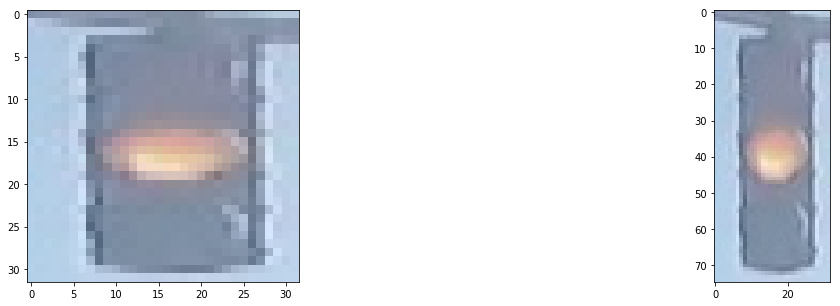

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

imNum = 723;
selected_image = STANDARDIZED_LIST[imNum][0]
ax1.imshow(selected_image)
print ("Std. Shape:",selected_image.shape)
print ("Std. Label:",STANDARDIZED_LIST[imNum][1])

imNum = 723;
unstand_image = IMAGE_LIST[imNum][0]
ax2.imshow(unstand_image)
print ("unStd. Shape:", unstand_image.shape)
print ("unStd. Label:", IMAGE_LIST[imNum][1])

# Feature Extraction
---

I'll be using color spaces, shape analysis, and feature construction to create features that help distinguish and classify the three types of traffic light images.

**A brightness feature using HSV color space**:

* Using HSV color space, I created a feature that helps identify the 3 different classes of traffic light.

## Creating a brightness feature 

Pictured below is a sample pipeline for creating a brightness feature (from left to right: standardized image, HSV color-masked image, cropped image, brightness feature):

<img src="images/feature_ext_steps.png" width="70%" height="70%">

## RGB to HSV conversion
---

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

Label [red, yellow, green]: [1, 0, 0]


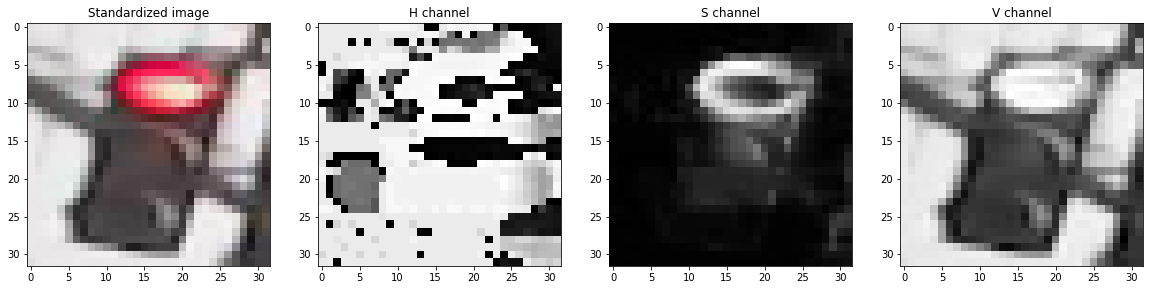

In [12]:
image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label [red, yellow, green]: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [14]:
# function to extract features
def create_feature(rgb_image):
    thresh = 35

    ## Convert image to HSV color space
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # HSV channels
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]

    # get pixels that are too saturated
    satPixels = v < thresh 

    # Make 'satPixels' -> 0
    v[satPixels] = 0

    # crop images accordingly
    v[:3, :] =0
    v[30:, :] = 0
    v[:, :5] = 0
    v[:, 27:] = 0

    # grab slices 
    topSlice = v[3:12, :]
    middleSlice = v[12:21, :]
    bottomSlice = v[21:30, :]

    top = topSlice.reshape(-1).sum()
    middle = middleSlice.reshape(-1).sum()
    bottom = bottomSlice.reshape(-1).sum()

    # return a feature value and/or vector 
    feature = [top, middle, bottom]
    return feature

In [15]:
def estimate_label(rgb_image):
    myFeature = create_feature(rgb_image)
    red = myFeature[0]
    yellow = myFeature[1]
    green = myFeature[2]
    
    predicted_label = one_hot_encode("yellow")
    if red > yellow and red > green:
        predicted_label = one_hot_encode("red")
    elif green > yellow and green > red:
        predicted_label = one_hot_encode("green")
    return predicted_label

## Testing the classifier
---

Here is where I test my classification algorithm using the test set of data that I set aside.

A "good" classifier in this case should meet the following criteria:
1. Get above 90% classification accuracy.
2. Never classify a red light as a green light. 

### Test dataset

Below, I load in the test dataset, standardize it using the `standardize` function defined above, and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [16]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Determine the Accuracy
---

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `MISCLASSIFIED`

In [17]:
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from the classifier
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


Accuracy: 0.9696969696969697
Number of misclassified images = 9 out of 297


## Visualize misclassified images
---

These are some of the images I classified wrong (in the `MISCLASSIFIED` list)

[1, 0, 0]


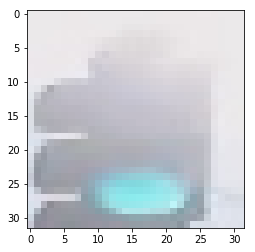

In [19]:
image_num = 1
selected_image = MISCLASSIFIED[image_num][0]
selected_label = MISCLASSIFIED[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print(selected_label)

Overall I am happy! I scored >90% accuracy. Most of the images are missclassified as greens being red, but at least not the inverse. I will continue to expand this project using machine learning and score higher. 
 
**weakness** I feel that there should be a more concrete way to identity the colors instead of assigning thresholds 2) The images that are passed in as values are all the same in that there is no obstruction so I feel like it woudn't work in a real-life application

**Strenghts** Instead of the actual colors I used features instead. A value channel with a higer value was a good indicator which light it was on. I also was able to tell if the light is from red, yellow or green top, middle and bottom respectively